# Link to Github Repo
https://github.com/morelap2015/ECE188Project2

# Perform an Adversarial attack.

For the second part of the project we consider a trained model (MobileNet) which is trained on the imagenet dataset. 

We use an evasion attack called [FGSM](https://neptune.ai/blog/adversarial-attacks-on-neural-networks-exploring-the-fast-gradient-sign-method#:~:text=The%20Fast%20Gradient%20Sign%20Method%20(FGSM)%20combines%20a%20white%20box,model%20into%20making%20wrong%20predictions.) to fool the neural network into making incorrect predictions.

## Import Packages.

Import the necessary packages we continue to use Tensorflow and Keras

In [7]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing import image

mpl.rcParams['figure.figsize'] = (8, 8)
mpl.rcParams['axes.grid'] = False

## Load the Pretrained model. 

We use the [MobileNetV2](https://arxiv.org/abs/1801.04381) model trained on the [Imagenet](https://www.image-net.org/) dataset. 

In [42]:
pretrained_model = tf.keras.applications.MobileNetV2(include_top=True,
                                                     weights='imagenet')
pretrained_model.trainable = False

# ImageNet labels
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

### Helper Function for Data Processing


Following functions can be used for data processing. Dont worry about these, just use them. 

In [119]:
# Helper function to preprocess the image so that it can be inputted in MobileNetV2
def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

## Load an Image. 


Load any image, we consider an image of a Golden Retriever. 

In [10]:
image_raw = tf.io.read_file('/content/panda-eating-bamboo-shoots.jpg')
image = tf.image.decode_image(image_raw)

image = preprocess(image)
image_probs = pretrained_model.predict(image)

49152/35363 [=========================================] - 0s 0us/step


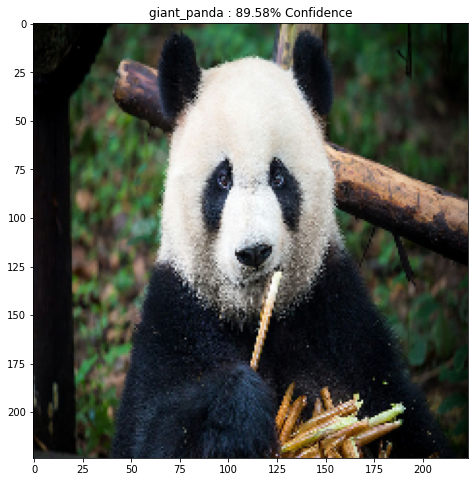

In [11]:
plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)  # To change [-1, 1] to [0,1]
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

## Create the Adversarial Image. 

We use the FGSM method to create an adversarial image. Be sure to read about FGSM to understand how the attack works. 

In [12]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = pretrained_model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

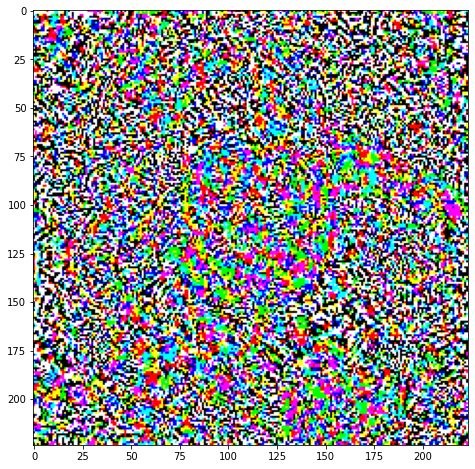

In [13]:
# Get the input label of the image.
giant_panda_index = 388
label = tf.one_hot(giant_panda_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0] * 0.5 + 0.5);  # To change [-1, 1] to [0,1]

In [14]:
def display_images(image, description):
  _, label, confidence = get_imagenet_label(pretrained_model.predict(image))
  plt.figure()
  plt.imshow(image[0]*0.5+0.5)
  plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
  plt.show()

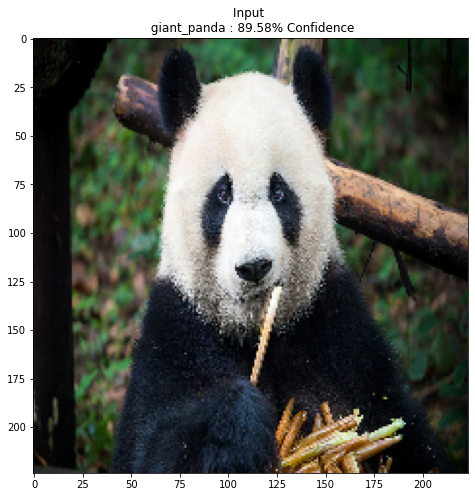

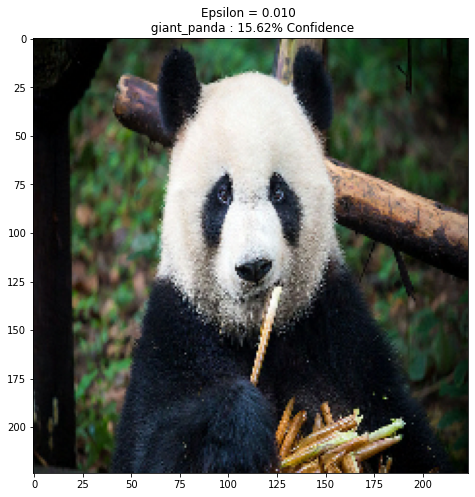

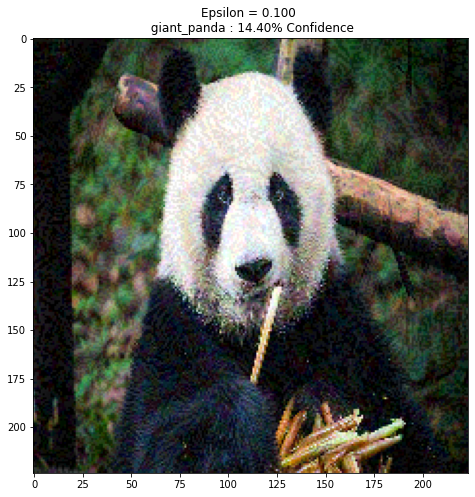

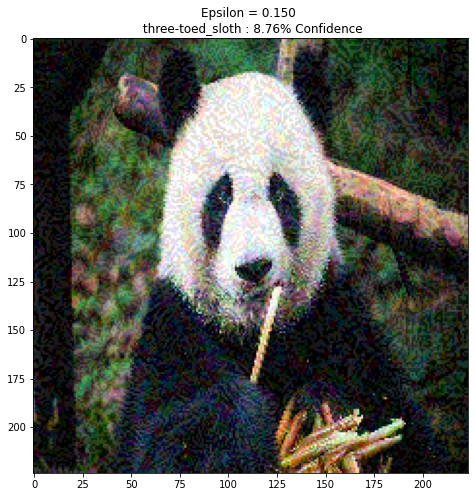

In [15]:
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
  adv_x = image + eps*perturbations
  adv_x = tf.clip_by_value(adv_x, -1, 1)
  display_images(adv_x, descriptions[i])

# Task2: Perform an Analysis to understand the potency of the attack. 

Your task here is to understand how small a change could change the class output and this is measured by the epsilon value needed to change the class. 

Your task is as follows:

* Pick 10 images each from different classes in imagenet. 
* Perform a perturbation analysis on each of these images. 
* In the analysis you are required to report the smallest epsilon value for which you notice a class change. 
* Make a table for each of the images considered with the minimum epsilon value for the FGSM attack. 

Write the Code for the above below. You can add the table also below. 

# Our Adversarial Attack


First, our current confidence level can be determined using the get_imagenet_label function



In [16]:
get_imagenet_label(pretrained_model.predict(image))

('n02510455', 'giant_panda', 0.8957979)

giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
giant_panda
gian

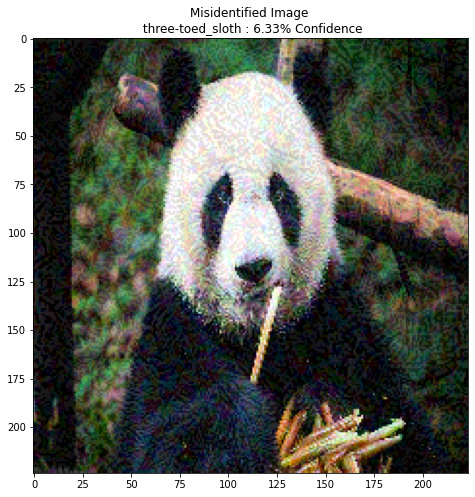

In [43]:
#First Class: Panda

correct_label = 'giant_panda'
predicted_label = 'giant_panda'
eps = 0.001
flag = 0 #Unsure but it seems like flag is a stand in for iterations?
### Perform Perturbation Analysis ###
giant_panda_index = 388
label = tf.one_hot(giant_panda_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))
perturbations = create_adversarial_pattern(image, label)
#_
#predicted_label
#confidence
while(correct_label == predicted_label):
  #Not sure what the point of bottom two lines is
  adjustment = image + perturbations*(flag*eps)
  adjustment = tf.clip_by_value(adjustment, -1, 1)
  #Not sure what first elem of following line is a stand in for
  _, predicted_label, confidence = get_imagenet_label(pretrained_model.predict(adjustment))
  #print("Label: ")
  print(predicted_label)
  flag+=1
print("Final Value: ")
print(eps*flag)
print("Image Modified is:")
display_images(adjustment, "Misidentified Image") #How would I be able to display the last panda classified image
# display_images(_, "Misidentified Image") How would I display images if I wanted to
#print(_)



Trying to Create a Function for the previous Step so Creating a Table is Easier

In [44]:
correct_label = 'giant_panda'
predicted_label = 'giant_panda'
def adversarialAttack(input_label, image_in, input_index):
  correct_label = input_label
  predicted_label = input_label
  image=image_in
  eps = 0.001
  ### Perform Perturbation Analysis ###
  image_index = input_index
  label = tf.one_hot(image_index, image_probs.shape[-1])
  label = tf.reshape(label, (1, image_probs.shape[-1]))
  perturbations = create_adversarial_pattern(image, label)
  flag = 0 #Unsure but it seems like flag is a stand in for iterations?
  while(correct_label == predicted_label):
    #Not sure what the point of bottom two lines is
    adjustment = image + perturbations*(flag*eps)
    adjustment = tf.clip_by_value(adjustment, -1, 1)
    #Not sure what first elem of following line is a stand in for
    _, predicted_label, confidence = get_imagenet_label(pretrained_model.predict(adjustment))
    flag+=1
    results = (adjustment, predicted_label, confidence, eps*flag, input_label)
    #print("Label: ")
    #print(predicted_label)
  print(f"Final Epsilon for {input_label} is {eps*flag}, predicted {predicted_label} instead")
  #print(eps*flag)
  return(results)
  #print("Final Value: ")
  #print(eps*flag)

In [45]:
#Add function for getting image of animal in variable
def image_from_path(input_path):
  image_raw = tf.io.read_file(input_path)
  image = tf.image.decode_image(image_raw)
  image = preprocess(image)
  return(image)



In [46]:
image_raw = tf.io.read_file('/content/panda-eating-bamboo-shoots.jpg')
panda_image = tf.image.decode_image(image_raw)
panda_image = preprocess(panda_image)
baboon_image = image_from_path('/content/Baboon.jpg')
hippo_image = image_from_path('/content/Hippopotamus.jpeg')
langur_image = image_from_path('/content/Langur.jpg')
otter_image = image_from_path('/content/Otter.jpg')
armadillo_image = image_from_path('/content/armadillo.jpg')
bison_image = image_from_path('/content/bison.jpg')
gazelle_image = image_from_path('/content/gazelle.jpg')
llama_image = image_from_path('/content/llama.jpeg')
warthog_image = image_from_path('/content/warthog.jpg')
zebra_image = image_from_path('/content/zebra.jpg')
#result of adversarialAttack is a tuple with: adjustment(imagedata), predicted_label, confidence, final eps value


#image_probs = pretrained_model.predict(image)

Keeping Results in Separate Cells because it takes a long time to run

In [21]:
#result of adversarialAttack is a tuple with: adjustment(imagedata), predicted_label, confidence, final eps value, Intended Image

In [47]:
#Panda Output
panda_tuple = adversarialAttack('giant_panda', panda_image, 388)

Final Epsilon for giant_panda is 0.134, predicted three-toed_sloth instead


In [48]:
#Baboon Output
baboon_tuple = adversarialAttack('baboon', baboon_image, 372)

Final Epsilon for baboon is 0.006, predicted mongoose instead


In [49]:
#Hippo Output
hippo_tuple = adversarialAttack('hippopotamus', hippo_image, 344)

Final Epsilon for hippopotamus is 0.007, predicted American_black_bear instead


In [50]:
#Langur Output - Not used in the final pd dataframe
langur_tuple = adversarialAttack('langur', langur_image, 374)
#Langur Output
funny_test = adversarialAttack('colobus', langur_image, 375)
#This image is misclassified, it is actually a langur but the model thinks it is a colobus

Final Epsilon for langur is 0.001, predicted colobus instead
Final Epsilon for colobus is 0.002, predicted langur instead


In [51]:
#Otter Output
otter_tuple = adversarialAttack('otter', otter_image, 360)

Final Epsilon for otter is 0.002, predicted mongoose instead


In [52]:
#Armadillo Output
armadillo_tuple = adversarialAttack('armadillo', armadillo_image, 363)

Final Epsilon for armadillo is 0.191, predicted peacock instead


In [53]:
#Bison Output
bison_tuple = adversarialAttack('bison', bison_image, 347)

Final Epsilon for bison is 0.011, predicted water_buffalo instead


In [54]:
#Gazelle Output
gazelle_tuple = adversarialAttack('gazelle', gazelle_image, 353)

Final Epsilon for gazelle is 0.009000000000000001, predicted impala instead


In [55]:
#Llama Output
llama_tuple = adversarialAttack('llama', llama_image, 455)

Final Epsilon for llama is 0.162, predicted peacock instead


In [56]:
#warthog Output
warthog_tuple = adversarialAttack('warthog', warthog_image, 343)

Final Epsilon for warthog is 0.005, predicted ox instead


In [57]:
#Zebra Output
zebra_tuple = adversarialAttack('zebra', zebra_image, 340)

Final Epsilon for zebra is 0.47800000000000004, predicted maze instead


Results for Each Animal

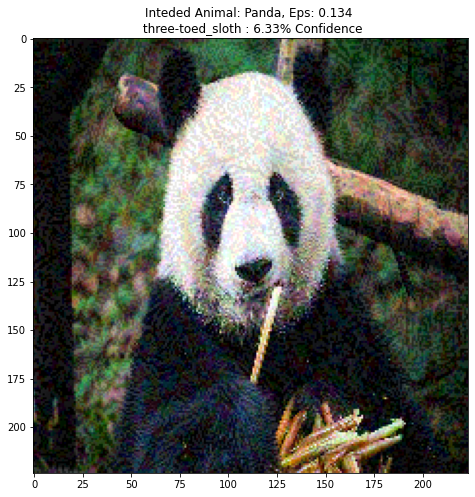

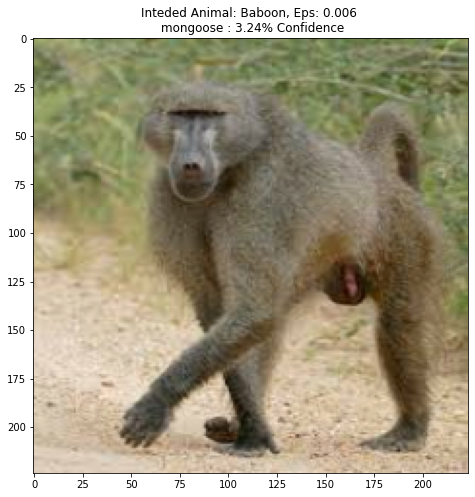

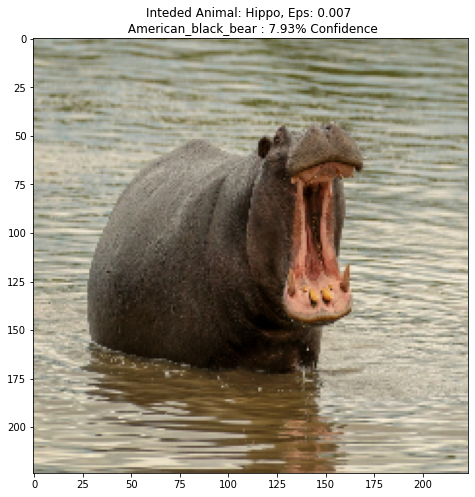

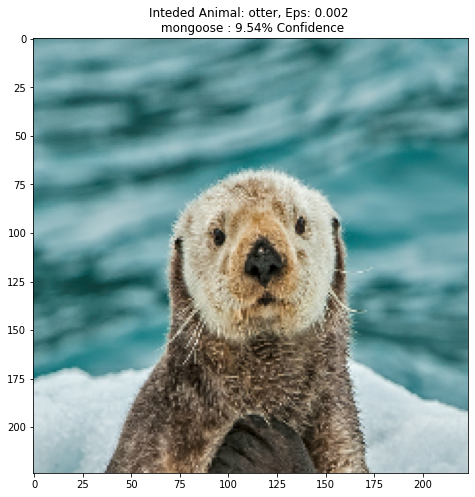

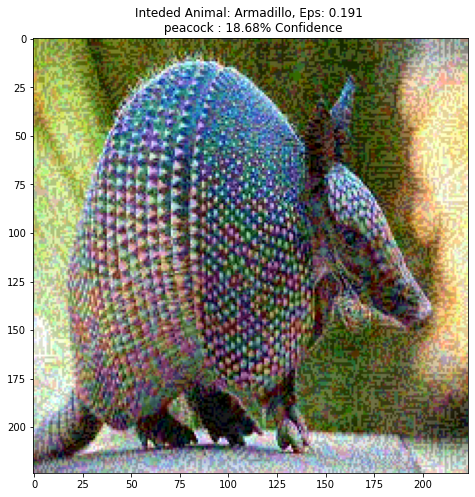

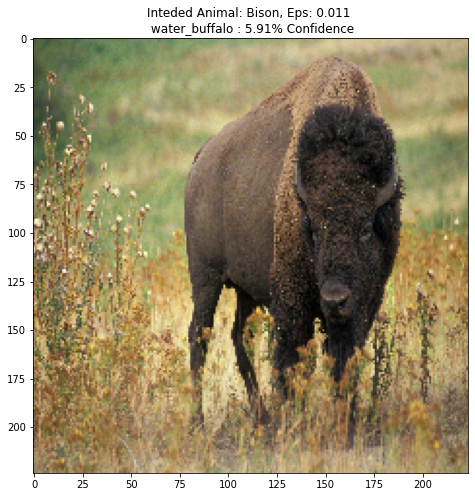

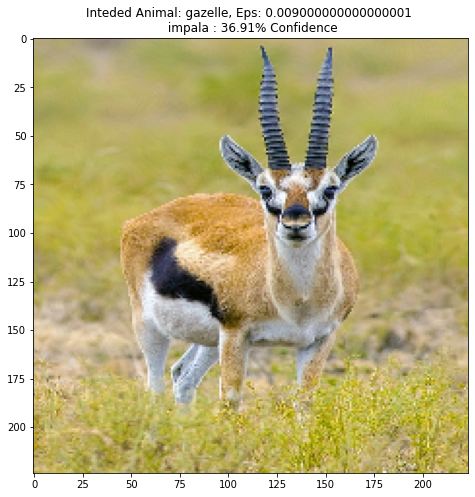

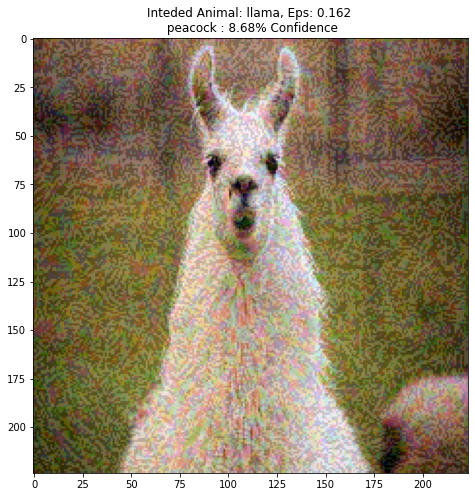

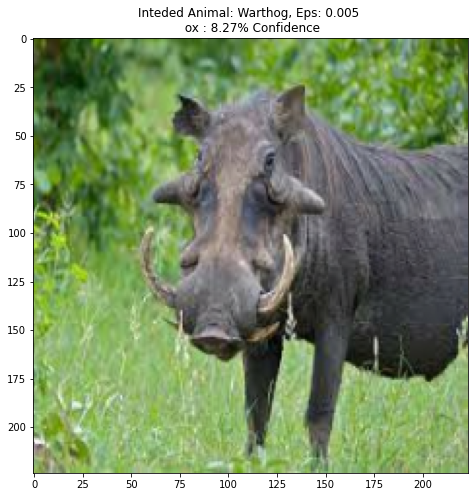

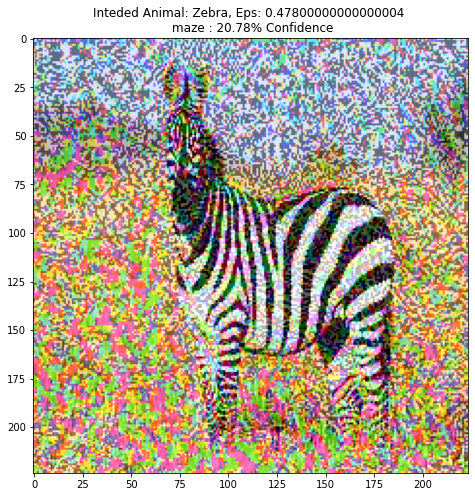

In [58]:
#Using f-strings to add epsilon value
display_images(panda_tuple[0], f"Inteded Animal: Panda, Eps: {panda_tuple[3]}")
display_images(baboon_tuple[0], f"Inteded Animal: Baboon, Eps: {baboon_tuple[3]}")
display_images(hippo_tuple[0], f"Inteded Animal: Hippo, Eps: {hippo_tuple[3]}")
display_images(otter_tuple[0], f"Inteded Animal: otter, Eps: {otter_tuple[3]}")
display_images(armadillo_tuple[0], f"Inteded Animal: Armadillo, Eps: {armadillo_tuple[3]}")
display_images(bison_tuple[0], f"Inteded Animal: Bison, Eps: {bison_tuple[3]}")
display_images(gazelle_tuple[0], f"Inteded Animal: gazelle, Eps: {gazelle_tuple[3]}")
display_images(llama_tuple[0], f"Inteded Animal: llama, Eps: {llama_tuple[3]}")
display_images(warthog_tuple[0], f"Inteded Animal: Warthog, Eps: {warthog_tuple[3]}")
display_images(zebra_tuple[0], f"Inteded Animal: Zebra, Eps: {zebra_tuple[3]}")
#display_images(panda_tuple[0], f"Inteded Animal: Panda, Eps: {panda_tuple[3]}")


In [59]:
data = list()
data.append(panda_tuple)
data.append(baboon_tuple)
data.append(hippo_tuple)
data.append(otter_tuple)
data.append(armadillo_tuple)
data.append(bison_tuple)
data.append(gazelle_tuple)
data.append(llama_tuple)
data.append(warthog_tuple)
data.append(zebra_tuple)

In [60]:
# import pandas to use pandas DataFrame
import pandas as pd

Our Table With Epsilon Values

In [61]:
MobileNetV2_df = pd.DataFrame(data, columns=['image','predicted_label', 'confidence', 'final eps value','Actual Label'])
print(MobileNetV2_df)

                                               image      predicted_label  \
0  (((tf.Tensor([-0.79935294 -0.7915098  -0.83856...     three-toed_sloth   
1  (((tf.Tensor([ 0.14794123  0.25165606 -0.24381...             mongoose   
2  (((tf.Tensor([0.3303698  0.37742862 0.29451546...  American_black_bear   
3  (((tf.Tensor([-0.35933012  0.11916713  0.15976...             mongoose   
4  (((tf.Tensor([ 0.08058828  0.5939216  -0.58607...              peacock   
5  (((tf.Tensor([-0.4588374  -0.30586714 -0.57340...        water_buffalo   
6  (((tf.Tensor([0.44108817 0.32344112 0.00187252...               impala   
7  (((tf.Tensor([-0.4237451  -0.62766665 -0.76100...              peacock   
8  (((tf.Tensor([-0.45604903 -0.24428435 -0.84943...                   ox   
9  (((tf.Tensor([-0.27844214 -0.1751908   0.03877...                 maze   

   confidence  final eps value  Actual Label  
0    0.063285            0.134   giant_panda  
1    0.032445            0.006        baboon  
2    0.0793

In [62]:
MobileNetV2_df.iloc[0:,1:]

predicted_label  confidence  final eps value  Actual Label
0     three-toed_sloth    0.063285            0.134   giant_panda
1             mongoose    0.032445            0.006        baboon
2  American_black_bear    0.079331            0.007  hippopotamus
3             mongoose    0.095403            0.002         otter
4              peacock    0.186778            0.191     armadillo
5        water_buffalo    0.059065            0.011         bison
6               impala    0.369068            0.009       gazelle
7              peacock    0.086761            0.162         llama
8                   ox    0.082723            0.005       warthog
9                 maze    0.207804            0.478         zebra

**FINAL TABLE FOR TASK 2**

In [63]:
MobileNetV2_df.iloc[0:,3:]

final eps value  Actual Label
0            0.134   giant_panda
1            0.006        baboon
2            0.007  hippopotamus
3            0.002         otter
4            0.191     armadillo
5            0.011         bison
6            0.009       gazelle
7            0.162         llama
8            0.005       warthog
9            0.478         zebra

In [64]:
MobileNetV2_df.head()

image      predicted_label  \
0  (((tf.Tensor([-0.79935294 -0.7915098  -0.83856...     three-toed_sloth   
1  (((tf.Tensor([ 0.14794123  0.25165606 -0.24381...             mongoose   
2  (((tf.Tensor([0.3303698  0.37742862 0.29451546...  American_black_bear   
3  (((tf.Tensor([-0.35933012  0.11916713  0.15976...             mongoose   
4  (((tf.Tensor([ 0.08058828  0.5939216  -0.58607...              peacock   

   confidence  final eps value  Actual Label  
0    0.063285            0.134   giant_panda  
1    0.032445            0.006        baboon  
2    0.079331            0.007  hippopotamus  
3    0.095403            0.002         otter  
4    0.186778            0.191     armadillo

# Task3: Compare the robustness of the considered model with other models. 

Your task here is to compare how this model (MobileNetV2) compares with other popular object detection models. 

Your task is as follows:

* Consider 5 different models (you can consider various RESNET architectures, any models you find interesting).
* Load the pre-trained weights of the model (trained on imagenet). 
* Perform Task2 on all the considered models. 
* Add all the results in the table. Hence the final table you have 6 columns for each model and epsilon values for each of the 10 images for all 6 models. 


What do you observe? Why do you think this is the case? 

Write the Code for the above below. You can also add the table and answer to the question below. 


In [40]:
#Importing 5 Models


In [114]:
mobileNet_model = tf.keras.applications.MobileNet(include_top=True,
                                                     weights='imagenet')
mobileNet_model.trainable = False

# ImageNet labels
decode_predictions = tf.keras.applications.mobilenet.decode_predictions

In [120]:
def adversarialAttackMobileNet(input_label, image_in, input_index):
  correct_label = input_label
  predicted_label = input_label
  image=image_in
  eps = 0.001
  ### Perform Perturbation Analysis ###
  image_index = input_index
  label = tf.one_hot(image_index, image_probs.shape[-1])
  label = tf.reshape(label, (1, image_probs.shape[-1]))
  perturbations = create_adversarial_pattern(image, label)
  flag = 0 #Unsure but it seems like flag is a stand in for iterations?
  while(correct_label == predicted_label):
    #Not sure what the point of bottom two lines is
    adjustment = image + perturbations*(flag*eps)
    adjustment = tf.clip_by_value(adjustment, -1, 1)
    #Not sure what first elem of following line is a stand in for
    _, predicted_label, confidence = get_imagenet_label(mobileNet_model.predict(adjustment))
    flag+=1
    results = (adjustment, predicted_label, confidence, eps*flag, input_label)
    #print("Label: ")
    #print(predicted_label)
  print(f"Final Epsilon for {input_label} is {eps*flag}, predicted {predicted_label} instead")
  #print(eps*flag)
  return(results)

In [121]:
#Panda Output
panda_tuple_MobileNet = adversarialAttackMobileNet('giant_panda', panda_image, 388)

Final Epsilon for giant_panda is 0.004, predicted standard_poodle instead


In [122]:
#Baboon Output
baboon_tuple_MobileNet = adversarialAttackMobileNet('baboon', baboon_image, 372)

Final Epsilon for baboon is 0.004, predicted patas instead


In [123]:
#Hippo Output
hippo_tuple_MobileNet = adversarialAttackMobileNet('hippopotamus', hippo_image, 344)

Final Epsilon for hippopotamus is 0.006, predicted weasel instead


In [124]:
#Langur Output - Not used in the final pd dataframe
langur_tuple_MobileNet = adversarialAttackMobileNet('langur', langur_image, 374)
#Langur Output
funny_test_MobileNet = adversarialAttackMobileNet('colobus', langur_image, 375)
#This image is misclassified, it is actually a langur but the model thinks it is a colobus

Final Epsilon for langur is 0.002, predicted guenon instead
Final Epsilon for colobus is 0.001, predicted langur instead


In [125]:
#Otter Output
otter_tuple_MobileNet = adversarialAttackMobileNet('otter', otter_image, 360)

Final Epsilon for otter is 0.002, predicted sea_lion instead


In [126]:
#Armadillo Output
armadillo_tuple_MobileNet = adversarialAttackMobileNet('armadillo', armadillo_image, 363)

Final Epsilon for armadillo is 0.012, predicted quail instead


In [127]:
#Bison Output
bison_tuple_MobileNet = adversarialAttackMobileNet('bison', bison_image, 347)

Final Epsilon for bison is 0.004, predicted tusker instead


In [128]:
#Gazelle Output
gazelle_tuple_MobileNet = adversarialAttackMobileNet('gazelle', gazelle_image, 353)

Final Epsilon for gazelle is 0.005, predicted impala instead


In [129]:
#Llama Output
llama_tuple_MobileNet = adversarialAttackMobileNet('llama', llama_image, 455)

Final Epsilon for llama is 0.216, predicted vestment instead


In [130]:
#warthog Output
warthog_tuple_MobileNet = adversarialAttackMobileNet('warthog', warthog_image, 343)

Final Epsilon for warthog is 0.005, predicted wild_boar instead


In [131]:
#Zebra Output
zebra_tuple_MobileNet = adversarialAttackMobileNet('zebra', zebra_image, 340)

Final Epsilon for zebra is 0.01, predicted tiger instead


Results for Each Animal

In [132]:
mobile_data = list()
mobile_data.append(panda_tuple_MobileNet)
mobile_data.append(baboon_tuple_MobileNet)
mobile_data.append(hippo_tuple_MobileNet)
mobile_data.append(otter_tuple_MobileNet)
mobile_data.append(armadillo_tuple_MobileNet)
mobile_data.append(bison_tuple_MobileNet)
mobile_data.append(gazelle_tuple_MobileNet)
mobile_data.append(llama_tuple_MobileNet)
mobile_data.append(warthog_tuple_MobileNet)
mobile_data.append(zebra_tuple_MobileNet)

Our Table With Epsilon Values

In [133]:
MobileNet_df = pd.DataFrame(mobile_data, columns=['image','predicted_label', 'confidence', 'final eps value','Actual Label'])
print(MobileNet_df)

                                               image  predicted_label  \
0  (((tf.Tensor([-0.92935294 -0.92750984 -0.96856...  standard_poodle   
1  (((tf.Tensor([ 0.15594123  0.24965607 -0.23581...            patas   
2  (((tf.Tensor([0.32936978 0.3764286  0.29351544...           weasel   
3  (((tf.Tensor([-0.3613301   0.12116714  0.15976...         sea_lion   
4  (((tf.Tensor([ 0.2815883  0.4149216 -0.3850784...            quail   
5  (((tf.Tensor([-0.4658374  -0.31286713 -0.58040...           tusker   
6  (((tf.Tensor([ 0.42908818  0.31944114 -0.01012...           impala   
7  (((tf.Tensor([-0.4777451  -0.25166664 -0.38500...         vestment   
8  (((tf.Tensor([-0.46404904 -0.24428435 -0.84943...        wild_boar   
9  (((tf.Tensor([0.18955785 0.2928092  0.5067794 ...            tiger   

   confidence  final eps value  Actual Label  
0    0.376327            0.004   giant_panda  
1    0.621493            0.004        baboon  
2    0.285750            0.006  hippopotamus  
3    0.6

In [134]:
MobileNet_df.iloc[0:,1:]

predicted_label  confidence  final eps value  Actual Label
0  standard_poodle    0.376327            0.004   giant_panda
1            patas    0.621493            0.004        baboon
2           weasel    0.285750            0.006  hippopotamus
3         sea_lion    0.606689            0.002         otter
4            quail    0.459506            0.012     armadillo
5           tusker    0.444314            0.004         bison
6           impala    0.546719            0.005       gazelle
7         vestment    0.163693            0.216         llama
8        wild_boar    0.528785            0.005       warthog
9            tiger    0.496788            0.010         zebra

**MobileNet Table FOR TASK 3**

In [135]:
MobileNet_df.iloc[0:,3:]

final eps value  Actual Label
0            0.004   giant_panda
1            0.004        baboon
2            0.006  hippopotamus
3            0.002         otter
4            0.012     armadillo
5            0.004         bison
6            0.005       gazelle
7            0.216         llama
8            0.005       warthog
9            0.010         zebra

In [136]:
MobileNet_df.head()

image  predicted_label  \
0  (((tf.Tensor([-0.92935294 -0.92750984 -0.96856...  standard_poodle   
1  (((tf.Tensor([ 0.15594123  0.24965607 -0.23581...            patas   
2  (((tf.Tensor([0.32936978 0.3764286  0.29351544...           weasel   
3  (((tf.Tensor([-0.3613301   0.12116714  0.15976...         sea_lion   
4  (((tf.Tensor([ 0.2815883  0.4149216 -0.3850784...            quail   

   confidence  final eps value  Actual Label  
0    0.376327            0.004   giant_panda  
1    0.621493            0.004        baboon  
2    0.285750            0.006  hippopotamus  
3    0.606689            0.002         otter  
4    0.459506            0.012     armadillo

In [150]:
#Not Actually the V3 Small Model, this is DenseNet121, V3 Small Was giving inaccurate results
mobileNetV3Small_model = tf.keras.applications.DenseNet121(include_top=True,
                                                     weights='imagenet')
mobileNetV3Small_model.trainable = False

# ImageNet labels
decode_predictions = tf.keras.applications.densenet.decode_predictions

In [151]:
def adversarialAttackMobileNetV3Small(input_label, image_in, input_index):
  correct_label = input_label
  predicted_label = input_label
  image=image_in
  eps = 0.001
  ### Perform Perturbation Analysis ###
  image_index = input_index
  label = tf.one_hot(image_index, image_probs.shape[-1])
  label = tf.reshape(label, (1, image_probs.shape[-1]))
  perturbations = create_adversarial_pattern(image, label)
  flag = 0 #Unsure but it seems like flag is a stand in for iterations?
  while(correct_label == predicted_label):
    #Not sure what the point of bottom two lines is
    adjustment = image + perturbations*(flag*eps)
    adjustment = tf.clip_by_value(adjustment, -1, 1)
    #Not sure what first elem of following line is a stand in for
    _, predicted_label, confidence = get_imagenet_label(mobileNetV3Small_model.predict(adjustment))
    flag+=1
    results = (adjustment, predicted_label, confidence, eps*flag, input_label)
    #print("Label: ")
    #print(predicted_label)
  print(f"Final Epsilon for {input_label} is {eps*flag}, predicted {predicted_label} instead")
  #print(eps*flag)
  return(results)

In [152]:
#Panda Output
panda_tuple_MobileNetV3Small = adversarialAttackMobileNetV3Small('giant_panda', panda_image, 388)

#Baboon Output
baboon_tuple_MobileNetV3Small = adversarialAttackMobileNetV3Small('baboon', baboon_image, 372)

#Hippo Output
hippo_tuple_MobileNetV3Small = adversarialAttackMobileNetV3Small('hippopotamus', hippo_image, 344)

#Langur Output - Not used in the final pd dataframe
langur_tuple_MobileNetV3Small = adversarialAttackMobileNetV3Small('langur', langur_image, 374)
#Langur Output
funny_test_MobileNetV3Small = adversarialAttackMobileNetV3Small('colobus', langur_image, 375)
#This image is misclassified, it is actually a langur but the model thinks it is a colobus

#Otter Output
otter_tuple_MobileNetV3Small = adversarialAttackMobileNetV3Small('otter', otter_image, 360)

#Armadillo Output
armadillo_tuple_MobileNetV3Small = adversarialAttackMobileNetV3Small('armadillo', armadillo_image, 363)

#Bison Output
bison_tuple_MobileNetV3Small = adversarialAttackMobileNetV3Small('bison', bison_image, 347)

#Gazelle Output
gazelle_tuple_MobileNetV3Small = adversarialAttackMobileNetV3Small('gazelle', gazelle_image, 353)

#Llama Output
llama_tuple_MobileNetV3Small = adversarialAttackMobileNetV3Small('llama', llama_image, 455)

#warthog Output
warthog_tuple_MobileNetV3Small = adversarialAttackMobileNetV3Small('warthog', warthog_image, 343)

#Zebra Output
zebra_tuple_MobileNetV3Small = adversarialAttackMobileNetV3Small('zebra', zebra_image, 340)

Final Epsilon for giant_panda is 0.159, predicted standard_poodle instead
Final Epsilon for baboon is 0.232, predicted warthog instead
Final Epsilon for hippopotamus is 0.055, predicted water_buffalo instead
Final Epsilon for langur is 0.126, predicted chimpanzee instead
Final Epsilon for colobus is 0.001, predicted langur instead
Final Epsilon for otter is 0.35000000000000003, predicted sea_lion instead
Final Epsilon for armadillo is 0.447, predicted electric_ray instead
Final Epsilon for bison is 0.045, predicted tusker instead
Final Epsilon for gazelle is 0.391, predicted tarantula instead
Final Epsilon for llama is 0.215, predicted wire-haired_fox_terrier instead
Final Epsilon for warthog is 0.41600000000000004, predicted wild_boar instead
Final Epsilon for zebra is 0.675, predicted centipede instead


In [156]:
DenseNet121_data = list()
DenseNet121_data.append(panda_tuple_MobileNetV3Small)
DenseNet121_data.append(baboon_tuple_MobileNetV3Small)
DenseNet121_data.append(hippo_tuple_MobileNetV3Small)
DenseNet121_data.append(otter_tuple_MobileNetV3Small)
DenseNet121_data.append(armadillo_tuple_MobileNetV3Small)
DenseNet121_data.append(bison_tuple_MobileNetV3Small)
DenseNet121_data.append(gazelle_tuple_MobileNetV3Small)
DenseNet121_data.append(llama_tuple_MobileNetV3Small)
DenseNet121_data.append(warthog_tuple_MobileNetV3Small)
DenseNet121_data.append(zebra_tuple_MobileNetV3Small)

In [158]:
DenseNet121_df = pd.DataFrame(DenseNet121_data, columns=['image','predicted_label', 'confidence', 'final eps value','Actual Label'])
print(DenseNet121_df)

                                               image          predicted_label  \
0  (((tf.Tensor([-0.77435297 -1.         -0.81356...          standard_poodle   
1  (((tf.Tensor([ 0.38394123  0.47765607 -0.00781...                  warthog   
2  (((tf.Tensor([0.37836978 0.4254286  0.34251544...            water_buffalo   
3  (((tf.Tensor([-0.7093301   0.46916714 -0.18823...                 sea_lion   
4  (((tf.Tensor([0.71658826 0.8499216  0.0499216 ...             electric_ray   
5  (((tf.Tensor([-0.42483738 -0.27186713 -0.53940...                   tusker   
6  (((tf.Tensor([ 0.0430882   0.7054411  -0.39612...                tarantula   
7  (((tf.Tensor([-0.47674507 -0.25266665 -0.38600...  wire-haired_fox_terrier   
8  (((tf.Tensor([-0.875049    0.16671565 -0.43843...                wild_boar   
9  (((tf.Tensor([-0.47544217 -0.37219083 -0.15822...                centipede   

   confidence  final eps value  Actual Label  
0    0.210946            0.159   giant_panda  
1    0.216010 

In [159]:
DenseNet121_df.iloc[0:,1:]

predicted_label  confidence  final eps value  Actual Label
0          standard_poodle    0.210946            0.159   giant_panda
1                  warthog    0.216010            0.232        baboon
2            water_buffalo    0.276045            0.055  hippopotamus
3                 sea_lion    0.467570            0.350         otter
4             electric_ray    0.144726            0.447     armadillo
5                   tusker    0.267506            0.045         bison
6                tarantula    0.259824            0.391       gazelle
7  wire-haired_fox_terrier    0.100730            0.215         llama
8                wild_boar    0.216430            0.416       warthog
9                centipede    0.094482            0.675         zebra

**DenseNet121 TABLE FOR TASK 3**

In [160]:
DenseNet121_df.iloc[0:,3:]

final eps value  Actual Label
0            0.159   giant_panda
1            0.232        baboon
2            0.055  hippopotamus
3            0.350         otter
4            0.447     armadillo
5            0.045         bison
6            0.391       gazelle
7            0.215         llama
8            0.416       warthog
9            0.675         zebra

In [153]:
denseNet169_model = tf.keras.applications.DenseNet169(include_top=True,
                                                     weights='imagenet')
denseNet169_model.trainable = False

# ImageNet labels
decode_predictions = tf.keras.applications.densenet.decode_predictions

58556416/58541896 [==============================] - 1s 0us/step


In [154]:
def adversarialAttackDenseNet169(input_label, image_in, input_index):
  correct_label = input_label
  predicted_label = input_label
  image=image_in
  eps = 0.001
  ### Perform Perturbation Analysis ###
  image_index = input_index
  label = tf.one_hot(image_index, image_probs.shape[-1])
  label = tf.reshape(label, (1, image_probs.shape[-1]))
  perturbations = create_adversarial_pattern(image, label)
  flag = 0 #Unsure but it seems like flag is a stand in for iterations?
  while(correct_label == predicted_label):
    #Not sure what the point of bottom two lines is
    adjustment = image + perturbations*(flag*eps)
    adjustment = tf.clip_by_value(adjustment, -1, 1)
    #Not sure what first elem of following line is a stand in for
    _, predicted_label, confidence = get_imagenet_label(denseNet169_model.predict(adjustment))
    flag+=1
    results = (adjustment, predicted_label, confidence, eps*flag, input_label)
    #print("Label: ")
    #print(predicted_label)
  print(f"Final Epsilon for {input_label} is {eps*flag}, predicted {predicted_label} instead")
  #print(eps*flag)
  return(results)

In [155]:
#Panda Output
panda_tuple_DenseNet169 = adversarialAttackDenseNet169('giant_panda', panda_image, 388)

#Baboon Output
baboon_tuple_DenseNet169 = adversarialAttackDenseNet169('baboon', baboon_image, 372)

#Hippo Output
hippo_tuple_DenseNet169 = adversarialAttackDenseNet169('hippopotamus', hippo_image, 344)

#Langur Output - Not used in the final pd dataframe
langur_tuple_DenseNet169 = adversarialAttackDenseNet169('langur', langur_image, 374)
#Langur Output
funny_test_DenseNet169 = adversarialAttackDenseNet169('colobus', langur_image, 375)
#This image is misclassified, it is actually a langur but the model thinks it is a colobus

#Otter Output
otter_tuple_DenseNet169 = adversarialAttackDenseNet169('otter', otter_image, 360)

#Armadillo Output
armadillo_tuple_DenseNet169 = adversarialAttackDenseNet169('armadillo', armadillo_image, 363)

#Bison Output
bison_tuple_DenseNet169 = adversarialAttackDenseNet169('bison', bison_image, 347)

#Gazelle Output
gazelle_tuple_DenseNet169 = adversarialAttackDenseNet169('gazelle', gazelle_image, 353)

#Llama Output
llama_tuple_DenseNet169 = adversarialAttackDenseNet169('llama', llama_image, 455)

#warthog Output
warthog_tuple_DenseNet169 = adversarialAttackDenseNet169('warthog', warthog_image, 343)

#Zebra Output
zebra_tuple_DenseNet169 = adversarialAttackDenseNet169('zebra', zebra_image, 340)

Final Epsilon for giant_panda is 0.241, predicted standard_poodle instead
Final Epsilon for baboon is 0.34700000000000003, predicted Weimaraner instead
Final Epsilon for hippopotamus is 0.232, predicted brown_bear instead
Final Epsilon for langur is 0.019, predicted guenon instead
Final Epsilon for colobus is 0.001, predicted langur instead
Final Epsilon for otter is 0.001, predicted brown_bear instead
Final Epsilon for armadillo is 0.499, predicted electric_ray instead
Final Epsilon for bison is 0.046, predicted wild_boar instead
Final Epsilon for gazelle is 0.436, predicted hare instead
Final Epsilon for llama is 0.41500000000000004, predicted pop_bottle instead
Final Epsilon for warthog is 0.41000000000000003, predicted Scotch_terrier instead
Final Epsilon for zebra is 0.772, predicted lionfish instead


In [161]:
DenseNet169_data = list()
DenseNet169_data.append(panda_tuple_DenseNet169)
DenseNet169_data.append(baboon_tuple_DenseNet169)
DenseNet169_data.append(hippo_tuple_DenseNet169)
DenseNet169_data.append(otter_tuple_DenseNet169)
DenseNet169_data.append(armadillo_tuple_DenseNet169)
DenseNet169_data.append(bison_tuple_DenseNet169)
DenseNet169_data.append(gazelle_tuple_DenseNet169)
DenseNet169_data.append(llama_tuple_DenseNet169)
DenseNet169_data.append(warthog_tuple_DenseNet169)
DenseNet169_data.append(zebra_tuple_DenseNet169)

In [168]:
DenseNet169_df = pd.DataFrame(DenseNet169_data, columns=['image','predicted_label', 'confidence', 'final eps value','Actual Label'])
#print(DenseNet169_df) #Takes too long to display df

In [163]:
DenseNet169_df.iloc[0:,1:]

predicted_label  confidence  final eps value  Actual Label
0  standard_poodle    0.352533            0.241   giant_panda
1       Weimaraner    0.097147            0.347        baboon
2       brown_bear    0.131241            0.232  hippopotamus
3       brown_bear    0.432487            0.001         otter
4     electric_ray    0.145590            0.499     armadillo
5        wild_boar    0.320168            0.046         bison
6             hare    0.324331            0.436       gazelle
7       pop_bottle    0.049459            0.415         llama
8   Scotch_terrier    0.116964            0.410       warthog
9         lionfish    0.254247            0.772         zebra

**DenseNet169 TABLE FOR TASK 3**

In [164]:
DenseNet169_df.iloc[0:,3:]

final eps value  Actual Label
0            0.241   giant_panda
1            0.347        baboon
2            0.232  hippopotamus
3            0.001         otter
4            0.499     armadillo
5            0.046         bison
6            0.436       gazelle
7            0.415         llama
8            0.410       warthog
9            0.772         zebra

In [165]:
denseNet201_model = tf.keras.applications.DenseNet201(include_top=True,
                                                     weights='imagenet')
denseNet201_model.trainable = False

# ImageNet labels
decode_predictions = tf.keras.applications.densenet.decode_predictions

82534400/82524592 [==============================] - 1s 0us/step


In [166]:
def adversarialAttackDenseNet201(input_label, image_in, input_index):
  correct_label = input_label
  predicted_label = input_label
  image=image_in
  eps = 0.001
  ### Perform Perturbation Analysis ###
  image_index = input_index
  label = tf.one_hot(image_index, image_probs.shape[-1])
  label = tf.reshape(label, (1, image_probs.shape[-1]))
  perturbations = create_adversarial_pattern(image, label)
  flag = 0 #Unsure but it seems like flag is a stand in for iterations?
  while(correct_label == predicted_label):
    #Not sure what the point of bottom two lines is
    adjustment = image + perturbations*(flag*eps)
    adjustment = tf.clip_by_value(adjustment, -1, 1)
    #Not sure what first elem of following line is a stand in for
    _, predicted_label, confidence = get_imagenet_label(denseNet201_model.predict(adjustment))
    flag+=1
    results = (adjustment, predicted_label, confidence, eps*flag, input_label)
    #print("Label: ")
    #print(predicted_label)
  print(f"Final Epsilon for {input_label} is {eps*flag}, predicted {predicted_label} instead")
  #print(eps*flag)
  return(results)

In [167]:
#Panda Output
panda_tuple_DenseNet201 = adversarialAttackDenseNet201('giant_panda', panda_image, 388)

#Baboon Output
baboon_tuple_DenseNet201 = adversarialAttackDenseNet201('baboon', baboon_image, 372)

#Hippo Output
hippo_tuple_DenseNet201 = adversarialAttackDenseNet201('hippopotamus', hippo_image, 344)

#Langur Output - Not used in the final pd dataframe
langur_tuple_DenseNet201 = adversarialAttackDenseNet201('langur', langur_image, 374)
#Langur Output
funny_test_DenseNet201 = adversarialAttackDenseNet201('colobus', langur_image, 375)
#This image is misclassified, it is actually a langur but the model thinks it is a colobus

#Otter Output
otter_tuple_DenseNet201 = adversarialAttackDenseNet201('otter', otter_image, 360)

#Armadillo Output
armadillo_tuple_DenseNet201 = adversarialAttackDenseNet201('armadillo', armadillo_image, 363)

#Bison Output
bison_tuple_DenseNet201 = adversarialAttackDenseNet201('bison', bison_image, 347)

#Gazelle Output
gazelle_tuple_DenseNet201 = adversarialAttackDenseNet201('gazelle', gazelle_image, 353)

#Llama Output
llama_tuple_DenseNet201 = adversarialAttackDenseNet201('llama', llama_image, 455)

#warthog Output
warthog_tuple_DenseNet201 = adversarialAttackDenseNet201('warthog', warthog_image, 343)

#Zebra Output
zebra_tuple_DenseNet201 = adversarialAttackDenseNet201('zebra', zebra_image, 340)

Final Epsilon for giant_panda is 0.245, predicted standard_poodle instead
Final Epsilon for baboon is 0.357, predicted mongoose instead
Final Epsilon for hippopotamus is 0.23500000000000001, predicted Indian_elephant instead
Final Epsilon for langur is 0.001, predicted macaque instead
Final Epsilon for colobus is 0.001, predicted macaque instead
Final Epsilon for otter is 0.461, predicted sea_lion instead
Final Epsilon for armadillo is 0.549, predicted brain_coral instead
Final Epsilon for bison is 0.081, predicted wild_boar instead
Final Epsilon for gazelle is 0.577, predicted shower_curtain instead
Final Epsilon for llama is 0.266, predicted wallaby instead
Final Epsilon for warthog is 0.295, predicted wild_boar instead
Final Epsilon for zebra is 0.746, predicted quilt instead


In [169]:
DenseNet201_data = list()
DenseNet201_data.append(panda_tuple_DenseNet201)
DenseNet201_data.append(baboon_tuple_DenseNet201)
DenseNet201_data.append(hippo_tuple_DenseNet201)
DenseNet201_data.append(otter_tuple_DenseNet201)
DenseNet201_data.append(armadillo_tuple_DenseNet201)
DenseNet201_data.append(bison_tuple_DenseNet201)
DenseNet201_data.append(gazelle_tuple_DenseNet201)
DenseNet201_data.append(llama_tuple_DenseNet201)
DenseNet201_data.append(warthog_tuple_DenseNet201)
DenseNet201_data.append(zebra_tuple_DenseNet201)

In [170]:
DenseNet201_df = pd.DataFrame(DenseNet201_data, columns=['image','predicted_label', 'confidence', 'final eps value','Actual Label'])
#print(DenseNet169_df) #Takes too long to display df

In [171]:
DenseNet201_df.iloc[0:,1:]

predicted_label  confidence  final eps value  Actual Label
0  standard_poodle    0.442813            0.245   giant_panda
1         mongoose    0.273183            0.357        baboon
2  Indian_elephant    0.204724            0.235  hippopotamus
3         sea_lion    0.190399            0.461         otter
4      brain_coral    0.101442            0.549     armadillo
5        wild_boar    0.212750            0.081         bison
6   shower_curtain    0.182595            0.577       gazelle
7          wallaby    0.458876            0.266         llama
8        wild_boar    0.392926            0.295       warthog
9            quilt    0.243672            0.746         zebra

**DenseNet201 TABLE FOR TASK 3**

In [172]:
DenseNet201_df.iloc[0:,3:]

final eps value  Actual Label
0            0.245   giant_panda
1            0.357        baboon
2            0.235  hippopotamus
3            0.461         otter
4            0.549     armadillo
5            0.081         bison
6            0.577       gazelle
7            0.266         llama
8            0.295       warthog
9            0.746         zebra

In [173]:
NASNetMobile_model = tf.keras.applications.NASNetMobile(include_top=True,
                                                     weights='imagenet')
NASNetMobile_model.trainable = False

# ImageNet labels
decode_predictions = tf.keras.applications.nasnet.decode_predictions

24240128/24227760 [==============================] - 0s 0us/step


In [174]:
def adversarialAttackNASNetMobile(input_label, image_in, input_index):
  correct_label = input_label
  predicted_label = input_label
  image=image_in
  eps = 0.001
  ### Perform Perturbation Analysis ###
  image_index = input_index
  label = tf.one_hot(image_index, image_probs.shape[-1])
  label = tf.reshape(label, (1, image_probs.shape[-1]))
  perturbations = create_adversarial_pattern(image, label)
  flag = 0 #Unsure but it seems like flag is a stand in for iterations?
  while(correct_label == predicted_label):
    #Not sure what the point of bottom two lines is
    adjustment = image + perturbations*(flag*eps)
    adjustment = tf.clip_by_value(adjustment, -1, 1)
    #Not sure what first elem of following line is a stand in for
    _, predicted_label, confidence = get_imagenet_label(NASNetMobile_model.predict(adjustment))
    flag+=1
    results = (adjustment, predicted_label, confidence, eps*flag, input_label)
    #print("Label: ")
    #print(predicted_label)
  print(f"Final Epsilon for {input_label} is {eps*flag}, predicted {predicted_label} instead")
  #print(eps*flag)
  return(results)

In [175]:
#Panda Output
panda_tuple_NASNetMobile = adversarialAttackNASNetMobile('giant_panda', panda_image, 388)

#Baboon Output
baboon_tuple_NASNetMobile = adversarialAttackNASNetMobile('baboon', baboon_image, 372)

#Hippo Output
hippo_tuple_NASNetMobile = adversarialAttackNASNetMobile('hippopotamus', hippo_image, 344)

#Langur Output - Not used in the final pd dataframe
langur_tuple_NASNetMobile = adversarialAttackNASNetMobile('langur', langur_image, 374)
#Langur Output
funny_test_NASNetMobile = adversarialAttackNASNetMobile('colobus', langur_image, 375)
#This image is misclassified, it is actually a langur but the model thinks it is a colobus

#Otter Output
otter_tuple_NASNetMobile = adversarialAttackNASNetMobile('otter', otter_image, 360)

#Armadillo Output
armadillo_tuple_NASNetMobile = adversarialAttackNASNetMobile('armadillo', armadillo_image, 363)

#Bison Output
bison_tuple_NASNetMobile = adversarialAttackNASNetMobile('bison', bison_image, 347)

#Gazelle Output
gazelle_tuple_NASNetMobile = adversarialAttackNASNetMobile('gazelle', gazelle_image, 353)

#Llama Output
llama_tuple_NASNetMobile = adversarialAttackNASNetMobile('llama', llama_image, 455)

#warthog Output
warthog_tuple_NASNetMobile = adversarialAttackNASNetMobile('warthog', warthog_image, 343)

#Zebra Output
zebra_tuple_NASNetMobile = adversarialAttackNASNetMobile('zebra', zebra_image, 340)

Final Epsilon for giant_panda is 0.148, predicted standard_poodle instead
Final Epsilon for baboon is 0.297, predicted hyena instead
Final Epsilon for hippopotamus is 0.036000000000000004, predicted water_buffalo instead
Final Epsilon for langur is 0.001, predicted gibbon instead
Final Epsilon for colobus is 0.001, predicted gibbon instead
Final Epsilon for otter is 0.055, predicted sea_lion instead
Final Epsilon for armadillo is 0.506, predicted brain_coral instead
Final Epsilon for bison is 0.054, predicted warthog instead
Final Epsilon for gazelle is 0.418, predicted starfish instead
Final Epsilon for llama is 0.317, predicted Bedlington_terrier instead
Final Epsilon for warthog is 0.326, predicted wild_boar instead
Final Epsilon for zebra is 0.766, predicted lionfish instead


In [176]:
NASNetMobile_data = list()
NASNetMobile_data.append(panda_tuple_NASNetMobile)
NASNetMobile_data.append(baboon_tuple_NASNetMobile)
NASNetMobile_data.append(hippo_tuple_NASNetMobile)
NASNetMobile_data.append(otter_tuple_NASNetMobile)
NASNetMobile_data.append(armadillo_tuple_NASNetMobile)
NASNetMobile_data.append(bison_tuple_NASNetMobile)
NASNetMobile_data.append(gazelle_tuple_NASNetMobile)
NASNetMobile_data.append(llama_tuple_NASNetMobile)
NASNetMobile_data.append(warthog_tuple_NASNetMobile)
NASNetMobile_data.append(zebra_tuple_NASNetMobile)

In [177]:
NASNetMobile_df = pd.DataFrame(NASNetMobile_data, columns=['image','predicted_label', 'confidence', 'final eps value','Actual Label'])
#print(DenseNet169_df) #Takes too long to display df

In [178]:
NASNetMobile_df.iloc[0:,1:]

predicted_label  confidence  final eps value  Actual Label
0     standard_poodle    0.386254            0.148   giant_panda
1               hyena    0.063472            0.297        baboon
2       water_buffalo    0.397149            0.036  hippopotamus
3            sea_lion    0.442424            0.055         otter
4         brain_coral    0.093172            0.506     armadillo
5             warthog    0.391948            0.054         bison
6            starfish    0.149064            0.418       gazelle
7  Bedlington_terrier    0.418350            0.317         llama
8           wild_boar    0.413186            0.326       warthog
9            lionfish    0.341705            0.766         zebra

**NASNetMobile TABLE FOR TASK 3**

In [180]:
NASNetMobile_df.iloc[0:,3:]

final eps value  Actual Label
0            0.148   giant_panda
1            0.297        baboon
2            0.036  hippopotamus
3            0.055         otter
4            0.506     armadillo
5            0.054         bison
6            0.418       gazelle
7            0.317         llama
8            0.326       warthog
9            0.766         zebra

# Summary of Results from Different Models

In [197]:
MobileNetV2_df.iloc[0:,3:]

final eps value  Actual Label
0            0.134   giant_panda
1            0.006        baboon
2            0.007  hippopotamus
3            0.002         otter
4            0.191     armadillo
5            0.011         bison
6            0.009       gazelle
7            0.162         llama
8            0.005       warthog
9            0.478         zebra

In [182]:
MobileNet_df.iloc[0:,3:]

final eps value  Actual Label
0            0.004   giant_panda
1            0.004        baboon
2            0.006  hippopotamus
3            0.002         otter
4            0.012     armadillo
5            0.004         bison
6            0.005       gazelle
7            0.216         llama
8            0.005       warthog
9            0.010         zebra

In [183]:
DenseNet121_df.iloc[0:,3:]

final eps value  Actual Label
0            0.159   giant_panda
1            0.232        baboon
2            0.055  hippopotamus
3            0.350         otter
4            0.447     armadillo
5            0.045         bison
6            0.391       gazelle
7            0.215         llama
8            0.416       warthog
9            0.675         zebra

In [186]:
DenseNet169_df.iloc[0:,3:]

final eps value  Actual Label
0            0.241   giant_panda
1            0.347        baboon
2            0.232  hippopotamus
3            0.001         otter
4            0.499     armadillo
5            0.046         bison
6            0.436       gazelle
7            0.415         llama
8            0.410       warthog
9            0.772         zebra

In [185]:
DenseNet201_df.iloc[0:,3:]

final eps value  Actual Label
0            0.245   giant_panda
1            0.357        baboon
2            0.235  hippopotamus
3            0.461         otter
4            0.549     armadillo
5            0.081         bison
6            0.577       gazelle
7            0.266         llama
8            0.295       warthog
9            0.746         zebra

In [187]:
NASNetMobile_df.iloc[0:,3:]

final eps value  Actual Label
0            0.148   giant_panda
1            0.297        baboon
2            0.036  hippopotamus
3            0.055         otter
4            0.506     armadillo
5            0.054         bison
6            0.418       gazelle
7            0.317         llama
8            0.326       warthog
9            0.766         zebra

In [193]:
frames = [MobileNetV2_df, MobileNet_df, DenseNet121_df, DenseNet169_df, DenseNet201_df, NASNetMobile_df]

In [194]:
result = pd.concat(frames)

In [195]:
result.iloc[0:,3:]

final eps value  Actual Label
0            0.134   giant_panda
1            0.006        baboon
2            0.007  hippopotamus
3            0.002         otter
4            0.191     armadillo
5            0.011         bison
6            0.009       gazelle
7            0.162         llama
8            0.005       warthog
9            0.478         zebra
0            0.004   giant_panda
1            0.004        baboon
2            0.006  hippopotamus
3            0.002         otter
4            0.012     armadillo
5            0.004         bison
6            0.005       gazelle
7            0.216         llama
8            0.005       warthog
9            0.010         zebra
0            0.159   giant_panda
1            0.232        baboon
2            0.055  hippopotamus
3            0.350         otter
4            0.447     armadillo
5            0.045         bison
6            0.391       gazelle
7            0.215         llama
8            0.416       warthog
9            0.675         zebra
0            0.241   giant_panda
1            0.347        baboon
2            0.232  hippopotamus
3            0.001         otter
4            0.499     armadillo
5            0.046         bison
6            0.436       gazelle
7            0.415         llama
8            0.410       warthog
9            0.772         zebra
0            0.245   giant_panda
1            0.357        baboon
2            0.235  hippopotamus
3            0.461         otter
4            0.549     armadillo
5            0.081         bison
6            0.577       gazelle
7            0.266         llama
8            0.295       warthog
9            0.746         zebra
0            0.148   giant_panda
1            0.297        baboon
2            0.036  hippopotamus
3            0.055         otter
4            0.506     armadillo
5            0.054         bison
6            0.418       gazelle
7            0.317         llama
8            0.326       warthog
9            0.766         zebra

In [205]:
MobileNetV2_df.describe()

confidence  final eps value
count   10.000000        10.000000
mean     0.126266         0.100500
std      0.101740         0.152198
min      0.032445         0.002000
25%      0.067296         0.006250
50%      0.084742         0.010000
75%      0.163934         0.155000
max      0.369068         0.478000

In [206]:
MobileNet_df.describe()

confidence  final eps value
count   10.000000        10.000000
mean     0.453006         0.026800
std      0.143806         0.066546
min      0.163693         0.002000
25%      0.393323         0.004000
50%      0.478147         0.005000
75%      0.542235         0.009000
max      0.621493         0.216000

In [200]:
DenseNet121_df.describe()

confidence  final eps value
count   10.000000        10.000000
mean     0.225427         0.298500
std      0.107361         0.195286
min      0.094482         0.045000
25%      0.161281         0.173000
50%      0.216220         0.291000
75%      0.265586         0.409750
max      0.467570         0.675000

In [201]:
DenseNet169_df.describe()

confidence  final eps value
count   10.000000        10.000000
mean     0.222417         0.339900
std      0.130366         0.224726
min      0.049459         0.001000
25%      0.120533         0.234250
50%      0.199919         0.378500
75%      0.323290         0.430750
max      0.432487         0.772000

In [203]:
DenseNet201_df.describe()

confidence  final eps value
count   10.000000        10.000000
mean     0.270338         0.381200
std      0.120774         0.199241
min      0.101442         0.081000
25%      0.193980         0.250250
50%      0.228211         0.326000
75%      0.362990         0.527000
max      0.458876         0.746000

In [204]:
NASNetMobile_df.describe()

confidence  final eps value
count   10.000000        10.000000
mean     0.309672         0.292300
std      0.147099         0.232675
min      0.063472         0.036000
25%      0.197224         0.078250
50%      0.389101         0.307000
75%      0.409177         0.395000
max      0.442424         0.766000

# Tabel 3 Summary Table, Model Type vs. Epsilon Values

| **_Model Names/Final Epsilon Value_** | **giant_panda** | **baboon** | **hippopotamus** | **otter** | **armadillo** | **bison** | **gazelle** | **llama** | **warthog** | **zebra** |
|---------------------------------------|-----------------|------------|------------------|-----------|---------------|-----------|-------------|-----------|-------------|-----------|
| **MobileNetV2**                       |      0.134      |    0.006   |       0.007      |   0.002   |     0.191     |   0.011   |    0.009    |   0.162   |    0.005    |   0.478   |
| **MobileNet**                         |      0.004      |    0.004   |       0.006      |   0.002   |     0.012     |   0.004   |    0.005    |   0.216   |    0.005    |   0.010   |
| **DenseNet121**                       |      0.159      |    0.232   |       0.055      |   0.350   |     0.447     |   0.045   |    0.391    |   0.215   |    0.416    |   0.675   |
| **DenseNet169**                       |      0.241      |    0.347   |       0.232      |   0.001   |     0.499     |   0.046   |    0.436    |   0.415   |    0.410    |   0.772   |
| **DenseNet201**                       |      0.245      |    0.357   |       0.235      |   0.461   |     0.549     |   0.081   |    0.577    |   0.266   |    0.295    |   0.746   |
| **NASNetMobile**                      |      0.148      |    0.297   |       0.036      |   0.055   |     0.506     |   0.054   |    0.418    |   0.317   |    0.326    |   0.766   |

| **Model Names** | **Average Epsilon Value** |
|-----------------|---------------------------|
| MobileNetV2     | 0.100500                  |
| MobileNet       | 0.026800                  |
| DenseNet121     | 0.298500                  |
| DenseNet169     | 0.339900                  |
| DenseNet201     | 0.381200                  |
| NASNetMobile    | 0.292300                  |

## Why we got the results and was it expected

*   The Model that required the largest average epsilon was DenseNet201 which aligns with the information provided on https://keras.io/api/applications/.

*   According to the table on that page, of the models we tested, DenseNet201 has the highest Top-1 and Top-5 Accuracy.

*   This implies that the confidence values from that model are likely higher than others, and as a result, the model requires more alteration (i.e a higher epsilon value) from an adversarial model for misclassification to occur.

*   As a result, we can determine that DenseNet201 is the most robust model of those tested.


*   From our testing, we get that the order of robustness is: DenseNet201 > DenseNet169 > DenseNet121 > NASNetMobile > MobileNetV2 > MobileNet
*   This aligns perfectly with what the website says regarding the different models accuracy.










# BONUS: Can you provide a better attack?

Can you design a better attack that lowers the epsilon required for the images?

Task:

* Design another attack. 
* Compare the epsilon values on 10 images. 
* Does it perform better than the FGSM attack? That is, does it have lower epsilon values?

Write the code and provide your answers below. 